In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('train-med.csv')
data_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [3]:
data_test = pd.read_csv('test-med.csv')
data_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


# Exploratory Data Analysis

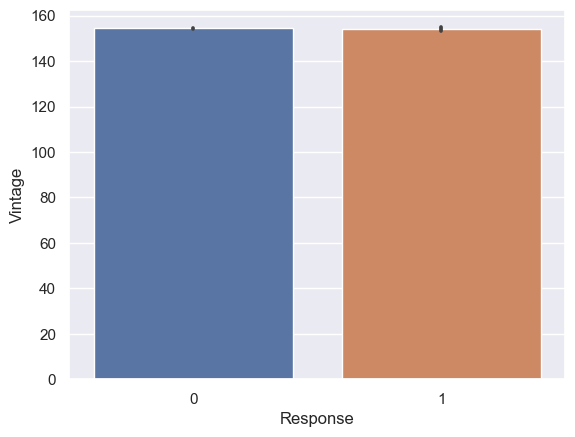

In [4]:
sns.barplot(data=data_train, x="Response", y="Vintage");

<AxesSubplot:xlabel='Response', ylabel='Policy_Sales_Channel'>

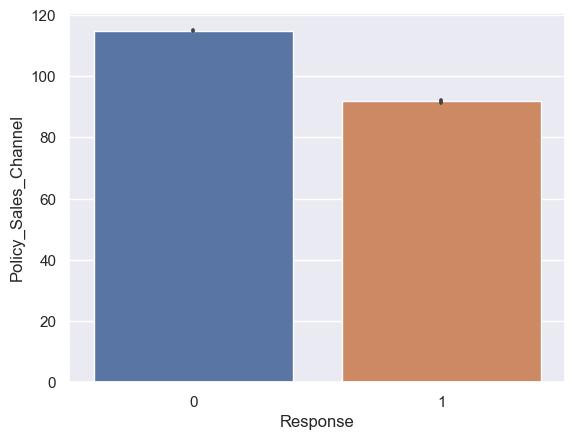

In [5]:
sns.barplot(data=data_train, x="Response", y="Policy_Sales_Channel")

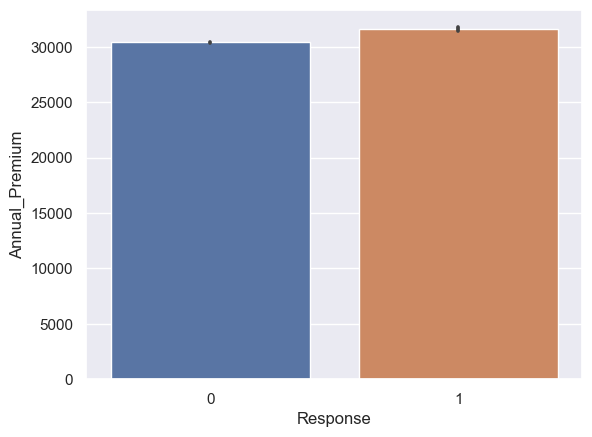

In [6]:
sns.barplot(data=data_train, x="Response", y="Annual_Premium");

<AxesSubplot:xlabel='Response', ylabel='count'>

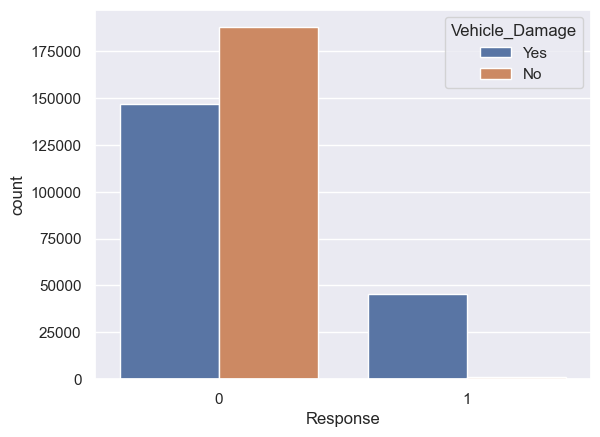

In [7]:
sns.countplot(data=data_train, x="Response", hue="Vehicle_Damage")

<AxesSubplot:xlabel='Response', ylabel='count'>

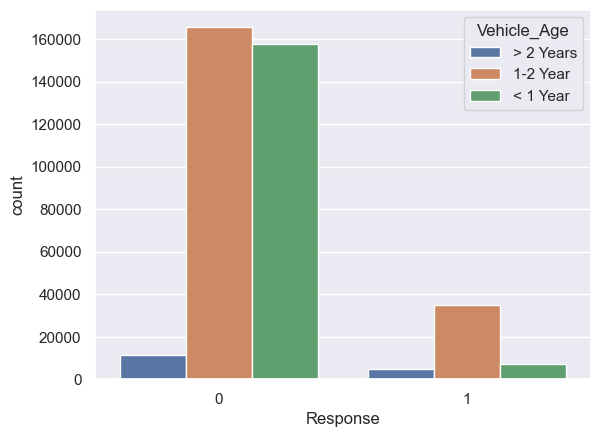

In [8]:
sns.countplot(data=data_train, x="Response", hue="Vehicle_Age")

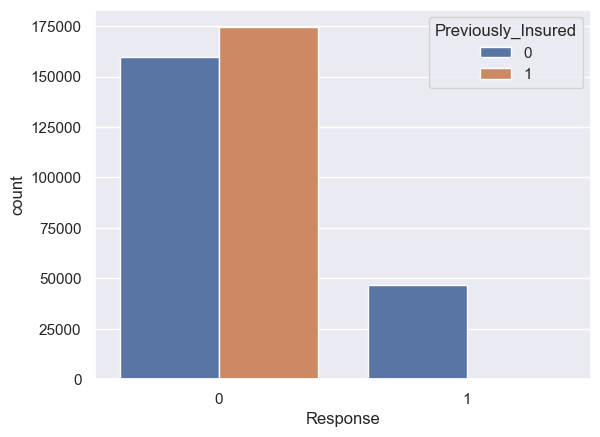

In [9]:
sns.countplot(data=data_train, x="Response", hue="Previously_Insured");

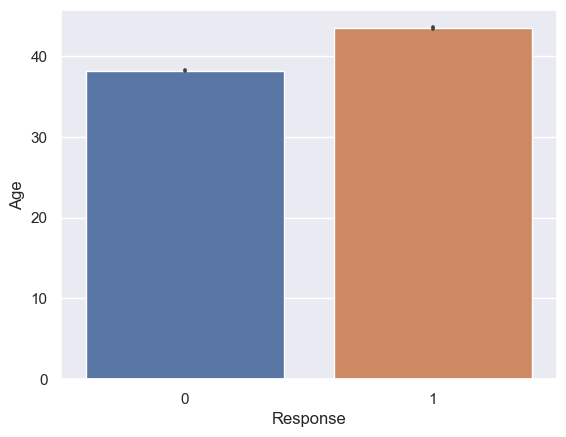

In [10]:
sns.barplot(data=data_train, x="Response", y="Age");

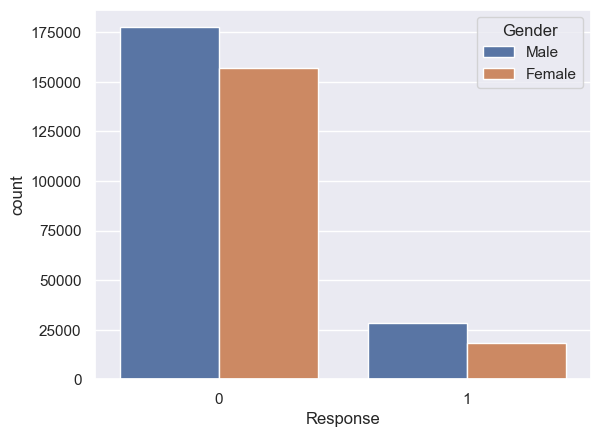

In [11]:
sns.countplot(data=data_train, x="Response", hue="Gender");

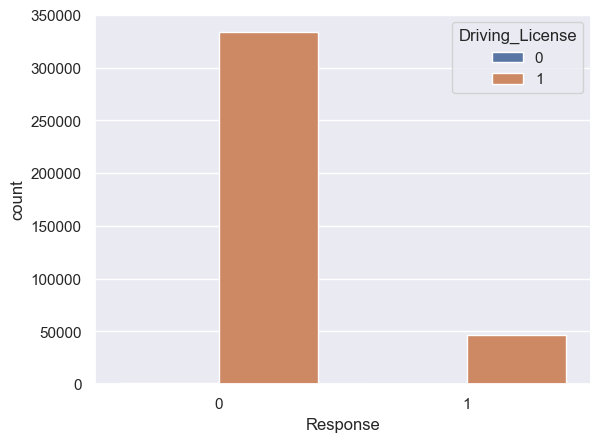

In [12]:
sns.countplot(data=data_train, x="Response", hue="Driving_License");

# Data Preprocessing

In [13]:
#Drop attributes that only has 1 or 0 unique value, there is no 1 or 0 unique value. We dont need to remove any attributes
data_train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [14]:
#Remove ID attributes
data_train.drop('id', axis=1, inplace = True)
data_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [15]:
data_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
data_train['Driving_License'].unique()

array([1, 0], dtype=int64)

In [17]:
data_train['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [18]:
data_train['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_train['Gender']= label_encoder.fit_transform(data_train['Gender'])
data_train['Gender'].unique()

array([1, 0])

In [20]:
data_train['Vehicle_Age']= label_encoder.fit_transform(data_train['Vehicle_Age'])
data_train['Vehicle_Age'].unique()

array([2, 0, 1])

In [21]:
data_train['Vehicle_Damage']= label_encoder.fit_transform(data_train['Vehicle_Damage'])
data_train['Vehicle_Damage'].unique()

array([1, 0])

In [22]:
data_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [23]:
data_train.dtypes

Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

# Check if the Class (Response) is balanced or not

0    334399
1     46710
Name: Response, dtype: int64

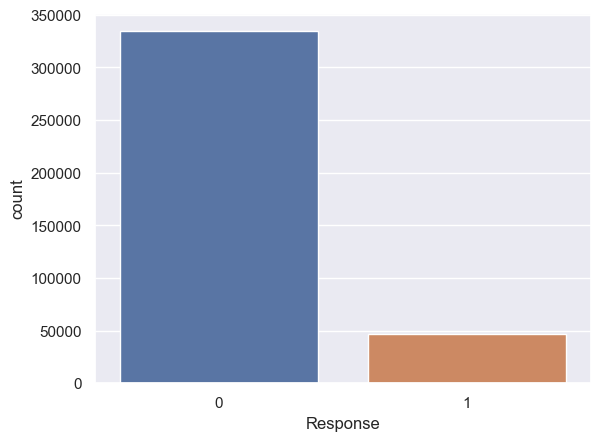

In [24]:
#Counting 1 and 0 Value in Response column
sns.countplot(data_train['Response'])
data_train['Response'].value_counts()

In [25]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data_train[(data_train['Response']==0)] 
df_minority = data_train[(data_train['Response']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 334399, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

1    334399
0    334399
Name: Response, dtype: int64

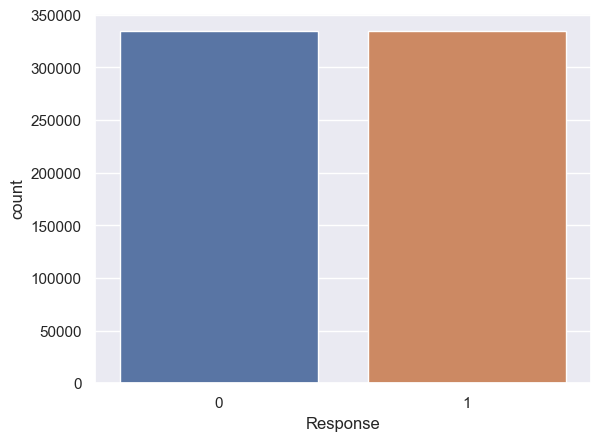

In [26]:
sns.countplot(df_upsampled['Response'])
df_upsampled['Response'].value_counts()

# Check the Outlier

<AxesSubplot:xlabel='Age'>

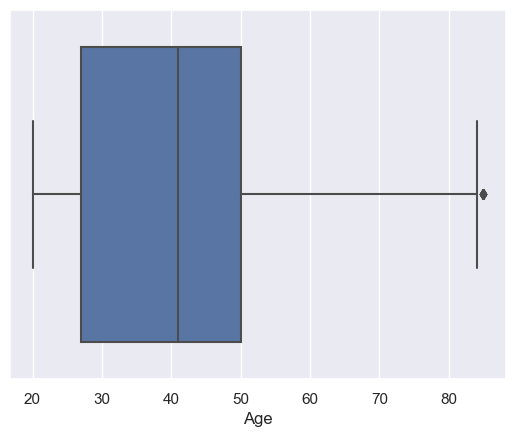

In [27]:
sns.boxplot(x=df_upsampled["Age"])

<AxesSubplot:xlabel='Annual_Premium'>

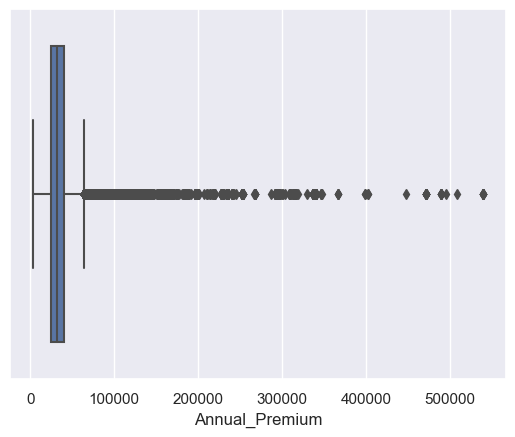

In [28]:
sns.boxplot(x=df_upsampled["Annual_Premium"])

<AxesSubplot:xlabel='Policy_Sales_Channel'>

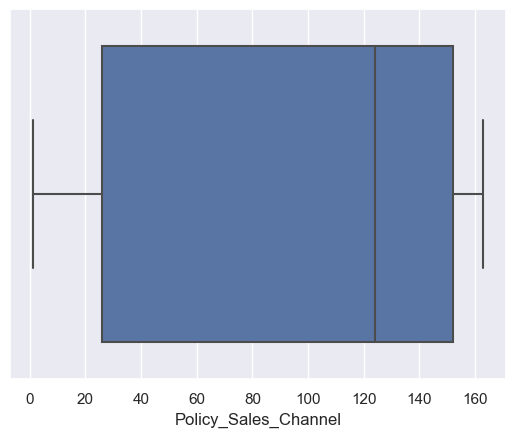

In [29]:
sns.boxplot(x=df_upsampled["Policy_Sales_Channel"])

<AxesSubplot:xlabel='Vintage'>

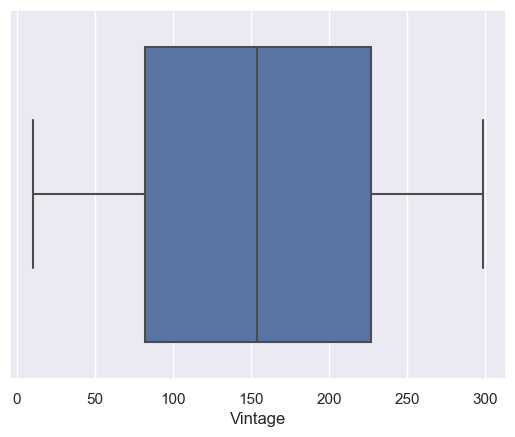

In [30]:
sns.boxplot(x=df_upsampled["Vintage"])

In [31]:
#Remove Outlier using Z-Score Method
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis = 1)] 
data_clean.shape

(664106, 11)

# Heatmap Data Correlation

<AxesSubplot:>

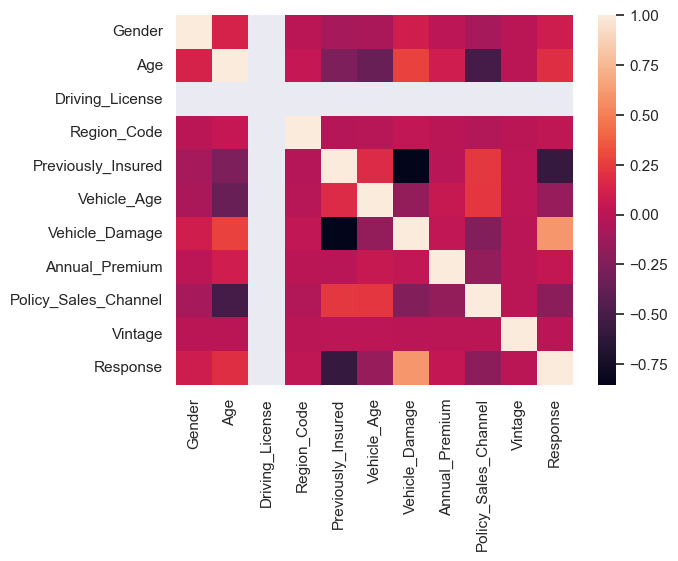

In [32]:
sns.heatmap(data_clean.corr(), fmt='.2g')

In [33]:
#Remove Driving License Attribute
data_clean.drop('Driving_License', axis=1, inplace = True)

In [34]:
data_clean.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
22008,1,43,13.0,0,0,1,26950.0,26.0,266,1
354307,0,60,24.0,0,0,1,2630.0,124.0,286,1
346468,0,23,28.0,0,1,1,44214.0,152.0,258,1
373994,1,43,28.0,0,0,1,35139.0,26.0,11,1
172967,1,38,28.0,0,0,1,34115.0,26.0,45,1


# Machine Learning Model Building

In [35]:
X = data_clean.drop('Response', axis=1)
y = data_clean['Response']

In [36]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 94.28 %


In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9457310058520483
Precision Score :  0.8983520212852605
Recall Score :  0.9983857584672249


# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [41]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 94.89 %


In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.951224244863346
Precision Score :  0.9082923883505806
Recall Score :  0.9984159312061552


# Logistic Regression 

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 72.1 %


In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7452745893188536
Precision Score :  0.6844896155545735
Recall Score :  0.8179075205551783


# Gaussian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [47]:
y_pred = gnb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 78.25 %


In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8097947036437141
Precision Score :  0.71845828514014
Recall Score :  0.9277362902617485


# Implement the model to predict test dataset

In [49]:
data_test['Gender']= label_encoder.fit_transform(data_test['Gender'])
data_test['Gender'].unique()

array([1, 0])

In [50]:
data_test['Vehicle_Age']= label_encoder.fit_transform(data_test['Vehicle_Age'])
data_test['Vehicle_Age'].unique()

array([1, 0, 2])

In [51]:
data_test['Vehicle_Damage']= label_encoder.fit_transform(data_test['Vehicle_Damage'])
data_test['Vehicle_Damage'].unique()

array([0, 1])

In [52]:
data_test.drop('Driving_License', axis=1, inplace = True)

In [53]:
data_test.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,11.0,1,1,0,35786.0,152.0,53
1,381111,1,40,28.0,0,0,1,33762.0,7.0,111
2,381112,1,47,28.0,0,0,1,40050.0,124.0,199
3,381113,1,24,27.0,1,1,1,37356.0,152.0,187
4,381114,1,27,28.0,1,1,0,59097.0,152.0,297


In [54]:
no = data_test[['id']]
no.head()

,id
0,381110
1,381111
2,381112
3,381113
4,381114


In [55]:
test = data_test.drop('id', axis=1)
test.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,11.0,1,1,0,35786.0,152.0,53
1,1,40,28.0,0,0,1,33762.0,7.0,111
2,1,47,28.0,0,0,1,40050.0,124.0,199
3,1,24,27.0,1,1,1,37356.0,152.0,187
4,1,27,28.0,1,1,0,59097.0,152.0,297


In [56]:
y_pred_prob = rfc.predict_proba(test)
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Not Interested', 'Interested'])
y_pred_prob_df

,Not Interested,Interested
0,1.00,0.00
1,0.42,0.58
2,0.77,0.23
3,1.00,0.00
4,1.00,0.00
...,...,...
127032,1.00,0.00
127033,0.44,0.56
127034,1.00,0.00
127035,1.00,0.00


In [57]:
y_pred_prob_df['id'] = no
y_pred_prob_df.head(20)

,Not Interested,Interested,id
0,1.00,0.00,381110
1,0.42,0.58,381111
2,0.77,0.23,381112
3,1.00,0.00,381113
4,1.00,0.00,381114
5,1.00,0.00,381115
6,1.00,0.00,381116
7,1.00,0.00,381117
8,0.60,0.40,381118
9,1.00,0.00,381119


# Submission using Predict

In [58]:
y_pred_prob2 = rfc.predict(test)
y_pred_prob_df2 = pd.DataFrame(data=y_pred_prob2)
y_pred_prob_df2

,0
0,0
1,1
2,0
3,0
4,0
...,...
127032,0
127033,1
127034,0
127035,0


In [59]:
y_pred_prob_df2['id'] = no
y_pred_prob_df2.head(20)

,0,id
0,0,381110
1,1,381111
2,0,381112
3,0,381113
4,0,381114
5,0,381115
6,0,381116
7,0,381117
8,0,381118
9,0,381119
